# Assignment 6: Clustering
### Joe Leonard (ymd3tv) - DS 3001

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

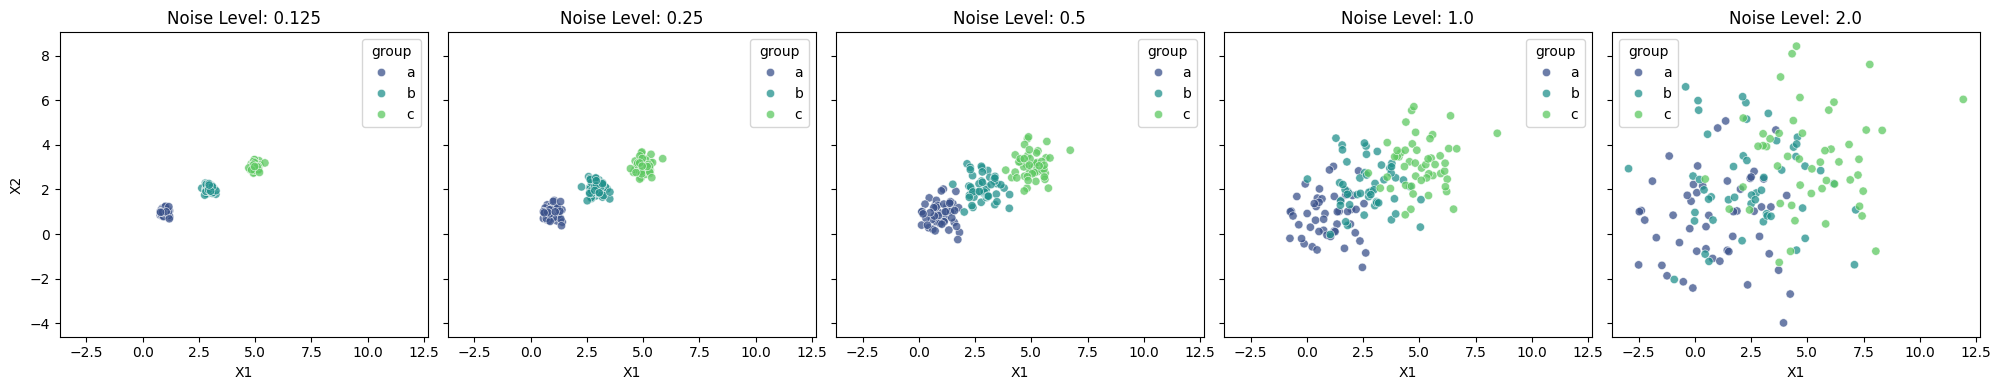

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting Data to Noise Levels
dfs = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]

fig, axes = plt.subplots(1, len(dfs), figsize=(20, 4), sharex=True, sharey=True)

for ax, df, noise in zip(axes, dfs, noise_levels):
    sns.scatterplot(data=df, x="x1", y="x2", hue="group", palette="viridis", alpha=0.75, ax=ax)
    ax.set_title(f"Noise Level: {noise}")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

plt.tight_layout()
plt.show()

As the noise level increases, we can see the data expand and become noisier and noisier. 

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

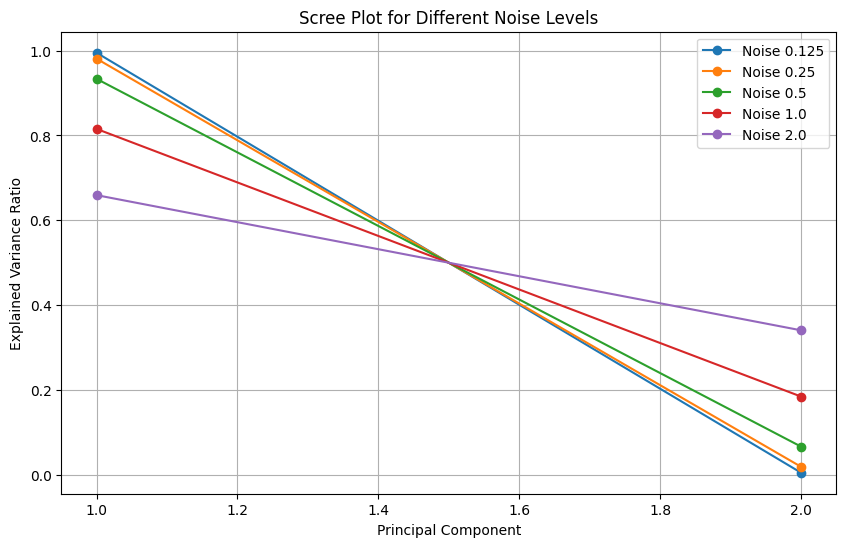

In [3]:
from sklearn.decomposition import PCA

plt.figure(figsize=(10, 6))

for df, noise in zip(dfs, noise_levels):
    X = df[['x1', 'x2']].values

    # Apply PCA
    pca = PCA()
    pca.fit(X)
    
    explained_variance = pca.explained_variance_ratio_

    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label=f"Noise {noise}")

# Formatting
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot for Different Noise Levels")
plt.legend()
plt.grid()
plt.show()

The higher the noise gets, the more straight the graph is and the more unclear and obvious the elbow is.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow method is based on the idea that the optimal number of clusters is found where the explained variance starts to level off—forming an "elbow" in the scree plot. When noise is low, the first principal component captures most of the variance, creating a sharp drop in the scree plot, making the elbow distinct and easy to identify. As noise increases, variance is more evenly distributed across components, causing the scree plot to flatten, making the elbow less pronounced and making it harder to determine the optimal 
$k$. In the highest noise scenario, the lack of a clear elbow suggests that the data has no strong underlying structure, making clustering or dimensionality reduction less meaningful.